Лабораторная работа 3. Обучение с учителем. Задача регрессии
ЗАДАНИЕ.
1. В соответствии с индивидуальным вариантом загрузить датасет (см. ML 3 semestr datasets) для решения задачи регрессии, выполнить предварительную обработку и разведочный анализ данных (EDA).
2. Выделить целевой признак и предикторы, разбить данные на обучающую и тестовую выборку.
3. Решить задачу регрессии на ваших данных с использованием моделей sklearn (простая линейная регрессия + L1, L2; множественная линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр.
4. Решить задачу регрессии на ваших данных с использованием моделей sklearn (Полиномиальная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр.
5. Вычислить значения метрик R2, MAE, MSE, RMSE, MAPE для всех обученных моделей. Выбрать лучшую модель.
6. Реализовать пайплайн при построении модели регрессии.
7. *Самостоятельно реализовать вычисление всех используемых метрик (в виде функций, принимающих два аргумента). Привести в таблице метрики, вычисленные с использование библиотеки Scikit-learn и соответствующими пользовательскими функциями.

Импортирую все что мне нужно

In [627]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns

## Выполнить предварительную обработку и разведочный анализ данных 

Читаю датафреймы и добавляю к ним столбец цвет, который будет отвечать за цвет вина, красное-6, белое -7

In [628]:
df1 = pd.read_csv(r"../data/winequality-red.csv",decimal=",",delimiter=";")
df2 = pd.read_csv(r"../data/winequality-white.csv",decimal=",",delimiter=";")
df1.insert (loc= len(df1.columns) , column='color', value=6)
df2.insert (loc= len(df2.columns) , column='color', value=7)
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6,7
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6,7
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6,7
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6,7
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.5,11.2,6,7
4894,6.6,0.32,0.36,8,0.047,57,168,0.9949,3.15,0.46,9.6,5,7
4895,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6,7
4896,5.5,0.29,0.3,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7,7


Обьединяю два датафрейма игнорируя индексы, а цвет вина уже в отдельном столбце

In [629]:
data = pd.concat([df1, df2], axis = 0,ignore_index = True)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,6
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5,6
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,6
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.5,11.2,6,7
6493,6.6,0.32,0.36,8,0.047,57,168,0.9949,3.15,0.46,9.6,5,7
6494,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6,7
6495,5.5,0.29,0.3,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7,7


In [630]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         6497 non-null   object
 1   volatile acidity      6497 non-null   object
 2   citric acid           6497 non-null   object
 3   residual sugar        6497 non-null   object
 4   chlorides             6497 non-null   object
 5   free sulfur dioxide   6497 non-null   object
 6   total sulfur dioxide  6497 non-null   object
 7   density               6497 non-null   object
 8   pH                    6497 non-null   object
 9   sulphates             6497 non-null   object
 10  alcohol               6497 non-null   object
 11  quality               6497 non-null   int64 
 12  color                 6497 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 660.0+ KB


Отличный датасет получается, без пропусков и категориальных значений, но надо поменять типы данных в некоторых столбцах

In [631]:
data['fixed acidity'] = data['fixed acidity'].astype(float)
data['volatile acidity'] = data['volatile acidity'].astype(float)
data['citric acid'] = data['citric acid'].astype(float)
data['residual sugar'] = data['residual sugar'].astype(float)
data['chlorides'] = data['chlorides'].astype(float)
data['free sulfur dioxide'] = data['free sulfur dioxide'].astype(float)
data['total sulfur dioxide'] = data['total sulfur dioxide'].astype(float)
data['density'] = data['density'].astype(float)
data['pH'] = data['pH'].astype(float)
data['sulphates'] = data['sulphates'].astype(float)
data['alcohol'] = data['alcohol'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


Получился датасет только с числовыми данными, без пропусков

In [632]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'color'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

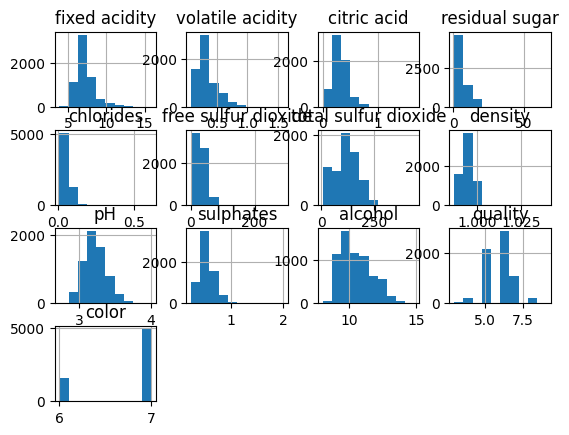

In [633]:
data.hist()

In [634]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [635]:
outlier=x = data.drop(["color", "quality"], axis=1)
Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
IQR = Q3 - Q1
data_f = outlier[~((outlier < (Q1 - 1.5 * IQR)) | (outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
index_list = list(data_f.index.values)
data_f = data[data.index.isin(index_list)]
data=data_f

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'color'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

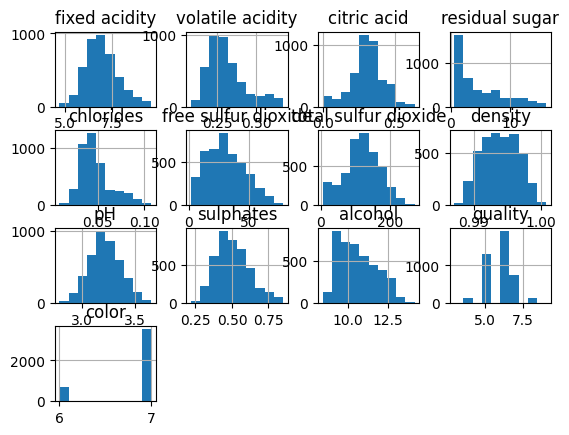

In [636]:
data.hist()

In [637]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
fixed acidity,1.000000,0.142915,0.222573,-0.044380,0.317288,-0.180752,-0.165080,0.369462,-0.257290,0.133452,-0.118289,-0.101360,-0.332071
volatile acidity,0.142915,1.000000,-0.437851,-0.115766,0.479483,-0.309446,-0.326788,0.254696,0.213307,0.197716,-0.051003,-0.207823,-0.613549
citric acid,0.222573,-0.437851,1.000000,0.152115,-0.199068,0.190787,0.257796,-0.004357,-0.254110,-0.035054,0.044840,0.102361,0.289033
residual sugar,-0.044380,-0.115766,0.152115,1.000000,-0.093635,0.419787,0.470908,0.568630,-0.222851,-0.135201,-0.314501,-0.050386,0.282336
chlorides,0.317288,0.479483,-0.199068,-0.093635,1.000000,-0.216588,-0.287739,0.554114,0.239495,0.328429,-0.390385,-0.277059,-0.719832
free sulfur dioxide,-0.180752,-0.309446,0.190787,0.419787,-0.216588,1.000000,0.690474,0.114415,-0.150050,-0.137457,-0.177394,0.083160,0.398202
total sulfur dioxide,-0.165080,-0.326788,0.257796,0.470908,-0.287739,0.690474,1.000000,0.150206,-0.210679,-0.187339,-0.284416,-0.065004,0.620572
density,0.369462,0.254696,-0.004357,0.568630,0.554114,0.114415,0.150206,1.000000,0.117482,0.234325,-0.755292,-0.348460,-0.371288
pH,-0.257290,0.213307,-0.254110,-0.222851,0.239495,-0.150050,-0.210679,0.117482,1.000000,0.276824,0.020809,0.053701,-0.356888
sulphates,0.133452,0.197716,-0.035054,-0.135201,0.328429,-0.137457,-0.187339,0.234325,0.276824,1.000000,-0.041435,0.042733,-0.421705


## Простая линейная регрессия

Не забудем про пайплайн

In [638]:
pipeline = Pipeline(
    [
        ('minmaxscaler', MinMaxScaler()),
        ('model', LinearRegression()),
        #('svc', SVC())
    ]
)


Целевой признак качество, предиктором будет alcohol

In [639]:
y = pd.DataFrame(data["quality"])
x = pd.DataFrame(data["alcohol"])

Разделим на обучающую и тестовую выборки 80\20

In [640]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Обучим модель и сделаем прогноз

In [641]:
lr = pipeline.fit(x_train, y_train)

y_pred = pd.DataFrame(lr.predict(x_test))

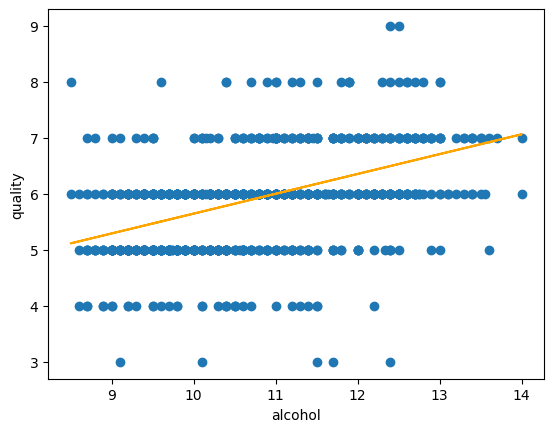

In [642]:
plt.scatter(x=x_test, y=y_test)
plt.plot(x_test, y_pred, c="orange")
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.show()

Модель попыталась, но в данном случае одного алкоголя оказалось недостаточно, посмотрим на метрики

In [643]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {lr.score(x_test, y_test)}')

MAE: 0.6331774308106568
MSE: 0.6517407743966128
RMSE: 0.8073046354360991
MAPE: 0.11572425938341498
R^2: 0.1814472299595058


Коэффицент детиерминации очень низкий

Теперь воспользуемся регуляризацией L1 лассо

подберем параметр через гридсерч

In [644]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Lasso()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_
best_params


{'model__alpha': 0.1}

Обучим модель с помощью регуляризатора лассо и оптимального параметра

MAE: 0.6811965811965813
MSE: 0.8000429448710954
RMSE: 0.8944511975905088
MAPE: 0.12461336404598818
R^2: -0.0048126408569120205


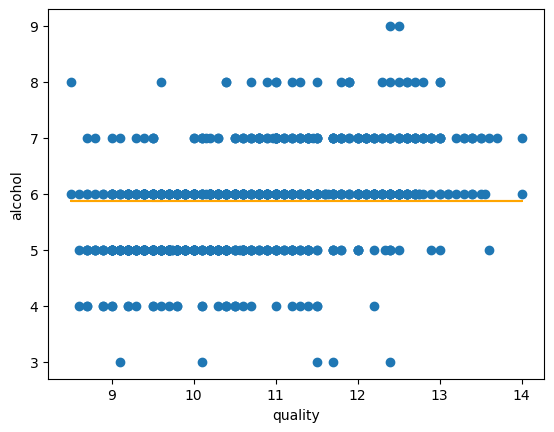

In [645]:
pipeline = pipeline.set_params(**best_params)
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

plt.scatter(x=x_test, y=y_test)
plt.plot(x_test, y_pred, c="orange")
plt.xlabel("quality")
plt.ylabel("alcohol")
plt.show()

Модель стала хуже, теперь это константное предсказание

теперь воспользуемся ридж

In [646]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Ridge()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.9}

MAE: 0.6331668674707575
MSE: 0.6515316724613094
RMSE: 0.8071751188319108
MAPE: 0.1157285985487718
R^2: 0.18170985119648764


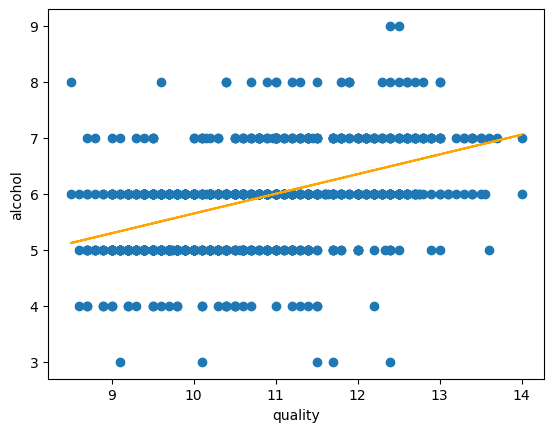

In [647]:
pipeline = pipeline.set_params(**best_params)
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

plt.scatter(x=x_test, y=y_test)
plt.plot(x_test, y_pred, c="orange")
plt.xlabel("quality")
plt.ylabel("alcohol")
plt.show()

ридж сработал гораздо лчше чем лассо, но по сути ситацию никак не изменил

Теперь воспольземся эластик нэт

In [648]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", ElasticNet())
    ]
)
param_grid = {
    "model__alpha": [0.1, 0.5, 1, 5, 30],
    "model__l1_ratio": np.arange(0.1, 1, 0.1),
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.1, 'model__l1_ratio': 0.1}

MAE: 0.6447771448794885
MSE: 0.7225487757142505
RMSE: 0.8500286911123944
MAPE: 0.11829922285243764
R^2: 0.09251603538564601


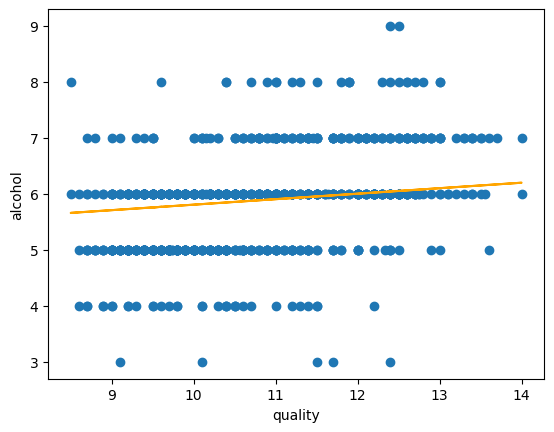

In [649]:
pipeline = pipeline.set_params(**best_params)
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

plt.scatter(x=x_test, y=y_test)
plt.plot(x_test, y_pred, c="orange")
plt.xlabel("quality")
plt.ylabel("alcohol")
plt.show()

Получилось что эластик нэт показал результат средний между ридж и лассо

Лучшая модель- либо без регуляризатора, либо с регуляризатором ридж.

## Множественная линейная регрессия

In [650]:
y = data["quality"]
x = data.drop("quality", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

обучим модель множественной линейной регрессии без регуляризатора

In [651]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression()),
    ]
)
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

посмотрим коэффиценты модели

In [652]:
pipeline.named_steps["model"].coef_

array([ 0.1205505 , -0.16440962, -0.00180018,  0.27471434, -0.05387768,
        0.12852464, -0.05879216, -0.35299588,  0.15148295,  0.10354098,
        0.24429555, -0.13934799])

In [653]:
y_pred = pipeline.predict(x_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 0.5626413884054832
MSE: 0.515487459077107
RMSE: 0.7179745532239336
MAPE: 0.09936697624914362
R^2: 0.29168955000733254


Коэффицент детерминации уже выше, значит модель более точна, но это все равно очень низкий результат, попробуем использовать лассо

строим пайплайн и подбираем коэффиценты

In [654]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Lasso()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.2, 1.2, 0.2)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.2}

In [655]:
pd.DataFrame(gridsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005007,0.000004,0.002009,0.000018,0.2,{'model__alpha': 0.2},-0.000066,-0.003081,-0.000712,-0.000035,-0.00194,-0.001167,0.00118,1
1,0.005205,0.000396,0.001998,0.000004,0.4,{'model__alpha': 0.4},-0.000066,-0.003081,-0.000712,-0.000035,-0.00194,-0.001167,0.00118,1
2,0.005203,0.000340,0.002007,0.000005,0.6,{'model__alpha': 0.6000000000000001},-0.000066,-0.003081,-0.000712,-0.000035,-0.00194,-0.001167,0.00118,1
3,0.005199,0.000403,0.001805,0.000398,0.8,{'model__alpha': 0.8},-0.000066,-0.003081,-0.000712,-0.000035,-0.00194,-0.001167,0.00118,1
4,0.005005,0.000006,0.001998,0.000007,1.0,{'model__alpha': 1.0},-0.000066,-0.003081,-0.000712,-0.000035,-0.00194,-0.001167,0.00118,1


подставим гмперпараметр в модель и обучим ее

In [656]:
pipeline.set_params(**best_params).fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 0.6490480786716467
MSE: 0.7277705409755885
RMSE: 0.853094684648538
MAPE: 0.11556702617259083
R^2: -3.936607706478412e-08


Лассо опять свела модель к константномуу предсказанию, думаю так будет и для полиномиальной регрессии. Попробуем с ридж регуляризацией

In [657]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Ridge()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.2, 1.2, 0.2)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.2}

In [658]:
pipeline.set_params(**best_params).fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 0.5627641412248544
MSE: 0.5159583594007862
RMSE: 0.7183024150041445
MAPE: 0.09939609572573406
R^2: 0.2910425049351516


Ридж опять показал себя неплохо(относительно лассо), время эластик нет

In [659]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", ElasticNet()),
    ]
)

param_grid = {
    "model__l1_ratio": np.arange(0.2, 1, 0.2)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_

pipeline.set_params(**best_params).fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 0.6490480786716467
MSE: 0.7277705409755885
RMSE: 0.853094684648538
MAPE: 0.11556702617259083
R^2: -3.936607706478412e-08


у меня модели видимо просто говорят: "4"

## Последняя надежда, Полиномиальная регрессия

Буду использовать множественную регрессию

In [660]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", LinearRegression()),
        
    ]
)

In [661]:
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

from sklearn.svm import SVC
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(x_train, y_train).score(x_test, y_test)

MAE: 0.5439851483360975
MSE: 0.47446137776878655
RMSE: 0.6888115691310552
MAPE: 0.09588342835035842
R^2: 0.3480618275501418


0.5520094562647754

Я попробовал степень 2, 3, 4, 5 и самая эффективная-2, будем использовать ее в следующих моделях

воспользуемся лассо

In [662]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", Lasso()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_

pipeline.set_params(**best_params).fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 0.6490480786716467
MSE: 0.7277705409755885
RMSE: 0.853094684648538
MAPE: 0.11556702617259083
R^2: -3.936607706478412e-08


лаccо не справилось, следующее ридж

In [663]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", Ridge()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_

pipeline.set_params(**best_params).fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 0.5396104315723633
MSE: 0.4694137041861879
RMSE: 0.6851377264362165
MAPE: 0.09508950247062947
R^2: 0.3549976314843589


Эластик нэт

In [664]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", ElasticNet()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_

pipeline.set_params(**best_params).fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 0.6153050086027108
MSE: 0.6564006953447046
RMSE: 0.810185593148079
MAPE: 0.10980557376556882
R^2: 0.09806637638188953


В общем зачете побеждает модель полиномиальной регрессии со степенью 2 без регуляризации, хотя победой это назвать сложно, ридж регуляризация почти не влияла на результат, а лассо сводила модель к константному предсказанию

Метод опорных векторов

c:\Users\User\ml-labs\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


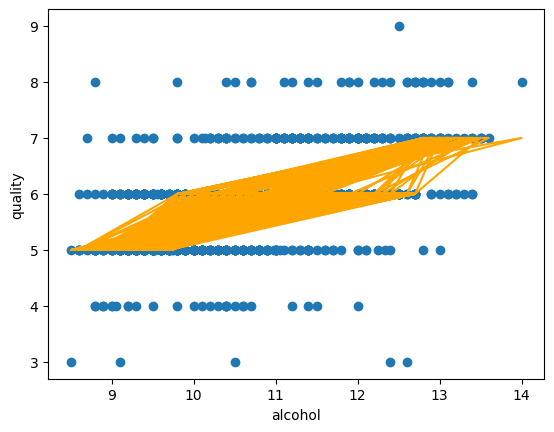

MAE: 0.5508274231678487
MSE: 0.7021276595744681
RMSE: 0.8379305815963922
MAPE: 0.09742204210289317
R^2: 0.5189125295508275


In [677]:
pipeline = Pipeline(
    [
        ('minmaxscaler', MinMaxScaler()),
        ('model', SVC()),
    ]
)
y = pd.DataFrame(data["quality"])
x = pd.DataFrame(data["alcohol"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
lr = pipeline.fit(x_train, y_train)

y_pred = pd.DataFrame(lr.predict(x_test))
plt.scatter(x=x_test, y=y_test)
plt.plot(x_test, y_pred, c="orange")
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.show()
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {lr.score(x_test, y_test)}')

## Реалезуем метрики самостоятельно

MAE

In [665]:
def MAE(y_test, y_pred):
  return  abs(y_test-y_pred).mean()

print(f'MAE: {mean_absolute_error(y_test, y_pred)}, My MAE: {MAE(y_test, y_pred)}')

MAE: 0.6153050086027108, My MAE: 0.6153050086027108


MSE

In [666]:
def MSE(y_test, y_pred):
  return  ((y_test-y_pred)**2).mean()

print(f'MAE: {mean_absolute_error(y_test, y_pred)}, My MAE: {MSE(y_test, y_pred)}')

MAE: 0.6153050086027108, My MAE: 0.6564006953447046


RMSE

In [667]:
def RMSE(y_test, y_pred):
  return  sqrt(MSE(y_test, y_pred))

print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}, My RMSE: {RMSE(y_test, y_pred)}')

RMSE: 0.810185593148079, My RMSE: 0.810185593148079


MAPE

In [668]:
def MAPE(y_test, y_pred):
  return  MAE(y_test, y_pred) / abs(y_test) .mean()

print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}, My_MAPE: {MAPE(y_test,y_pred)}')

MAPE: 0.10980557376556882, My_MAPE: 0.10505510338605314


R2

In [676]:
def R2(y_test, y_pred):
  return  1 - MSE(y_test, y_pred)/ ((y_test- y_test.mean())**2).mean()
print(f'R^2: {pipeline.score(x_test, y_test)}, My r2: {R2(y_test, y_pred)}')

R^2: 0.09806637638188953, My r2: 0.09806637638188964
